In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [91]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [92]:
true_params = [r, 2.2, 0.01, 0.3, -0.6, 0.02]

In [93]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

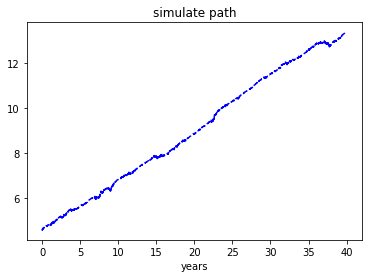

In [94]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[580]]


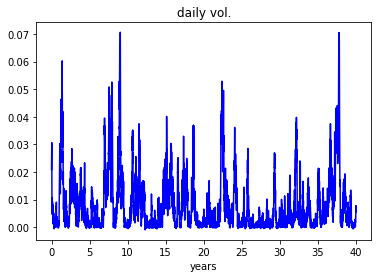

In [95]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# Filtering

In [103]:
reload(kf)

<module 'kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/kf.py'>

In [104]:
obs = np.array(y[0, :])[0]
ukf = kf.UKFHeston(obs, is_log=True)

## Optimize

In [105]:
def param_select(params1, params2, n_alphas=1000):
    params1 = np.array(params1)
    params2 = np.array(params2)
    alphas = np.linspace(0, 1, n_alphas)
    params = [a*params1+(1-a)*params2 for a in alphas]
    objs = [wrap_heston_obj(p, *args) for p in params]
    return objs

In [106]:
init_params = [0.5, 0.8, 0.08, 0.4, -0.3, 0.23]
params2 = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

In [107]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.5, 0.8, 0.08, 0.4, -0.3, 0.23]
True Params: [0.2, 2.2, 0.01, 0.3, -0.6, 0.02]


In [108]:
xopt = ukf.optimize(params2, maxiter=100)

[0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
i: 1
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -80867.77924776552
i: 2
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -80867.77924776552
i: 3
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -80867.77924776552
i: 4
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -81596.50214206084
i: 5
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -81596.50214206084
i: 6
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -82670.71496665217
i: 7
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -82670.71496665217
i: 8
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -82670.71496665217
i: 9
x_i: [ 0.40555556  1.28180556  0.02795833  0.35113426 -0.43944444  0.0380625 ]
f_i: -84711.15382012831
i: 10
x_i: [ 0.40555556  1.2

f_i: -113855.52383187947
i: 76
x_i: [ 0.00472182  1.75346465  0.01274894  0.32166934 -0.5151743   0.05601097]
f_i: -114737.2637941978
i: 77
x_i: [ 0.00472182  1.75346465  0.01274894  0.32166934 -0.5151743   0.05601097]
f_i: -114737.2637941978
i: 78
x_i: [ 0.00472182  1.75346465  0.01274894  0.32166934 -0.5151743   0.05601097]
f_i: -114737.2637941978
i: 79
x_i: [ 0.00528985  1.78224766  0.00984156  0.32237024 -0.51575458  0.05789693]
f_i: -115658.91110243303
i: 80
x_i: [ 0.00528985  1.78224766  0.00984156  0.32237024 -0.51575458  0.05789693]
f_i: -115658.91110243303
i: 81
x_i: [ 3.69228679e-04  1.83150544e+00  5.86567999e-03  3.20109939e-01
 -5.20157017e-01  6.03006695e-02]
f_i: -116579.67841301163
i: 82
x_i: [ 3.69228679e-04  1.83150544e+00  5.86567999e-03  3.20109939e-01
 -5.20157017e-01  6.03006695e-02]
f_i: -116579.67841301163
i: 83
x_i: [ 3.69228679e-04  1.83150544e+00  5.86567999e-03  3.20109939e-01
 -5.20157017e-01  6.03006695e-02]
f_i: -116579.67841301163
i: 84
x_i: [-4.53246973

# Plot Results

In [109]:
x_preds, y_preds = ukf.filter(obs, xopt)

In [110]:
print(xopt)
print(true_params)

[ 5.98028116e-03  1.87087494e+00  4.08421113e-04  3.16780887e-01
 -5.24872127e-01  6.34560243e-02]
[0.2, 2.2, 0.01, 0.3, -0.6, 0.02]


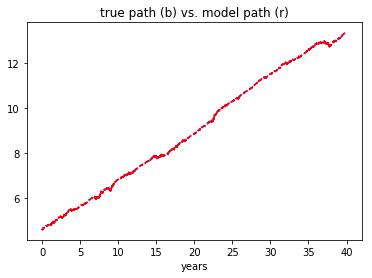

In [111]:
years = np.arange(y.shape[-1]) * (1/250)
plt.plot(years[:], y[0,:].T, 'b--')
plt.plot(years[:], y_preds[:], 'r--')
plt.title('true path (b) vs. model path (r)')
plt.xlabel('years')
plt.show()

# neg vol: [[580]]


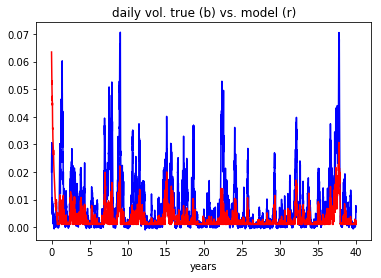

In [112]:
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,:])[0], 'b-')
plt.plot(years[:], x_preds[:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()